In [1]:
import sklearn as skt
import pandas as pd
import numpy as np 
import  matplotlib.pyplot as plt
%matplotlib inline
import math 
from statsmodels.tsa.arima_model import ARIMA

Reading Data

In [2]:
data = pd.read_csv("UN_cities_data.csv", "\t")
data.head()

,Country code,Country,City Code,Urban Agglomeration,Latitude,Longitude,1950,1955,1960,1965,...,2010,2015,2020,2025,"Cyclone risk (0=low, 3=high)",Drought risk,Earthquake risk,Flood risk,Landslide risk,Volcano risk
0,4,Afghanistan,20002,Kabul,34.54,69.17,128.931,184.622,264.803,368.809,...,3052.000,3402.137,4135.559,5125.916,0,3,1,3,0,0
1,12,Algeria,20006,El Djazaïr (Algiers),36.76,3.05,516.450,622.921,871.636,1081.394,...,2850.907,3202.959,3607.835,3976.732,0,2,1,2,0,0
2,12,Algeria,20035,Wahran (Oran),35.75,-0.63,268.935,286.368,304.936,324.697,...,775.666,825.859,920.440,1025.705,0,3,0,1,0,0
3,24,Angola,20050,Huambo,-12.76,15.75,15.306,23.818,37.069,47.875,...,1038.581,1345.176,1665.779,1996.751,0,3,0,0,0,0
4,24,Angola,20049,Luanda,-8.84,13.23,138.413,174.268,219.427,315.108,...,4790.142,6183.162,7555.184,8924.042,0,3,0,1,0,0


This analysis will be a time series analysis of the population of Afghanistan. The data will start in 1950
and will extrapolate until 2025. 

In [3]:
Afghan = data[data.Country == "Afghanistan"]
Afghan.columns
afghanYear = Afghan[['1950', '1955', '1960', '1965', '1970', '1975', '1980',
                    '1985', '1990','2000','2005','2010', '2015', '2020', '2025']]
afghanYear = np.transpose(afghanYear)
afghanYear.columns = ['Population']



Growth of Population in Afghanistan from 1950 

It appears that the population has been steadily increasing throughout the entire duration 
of the data set. There appear to be a few upticks in 1990 and 2005. However, it appears to be mostly 
smooth and increasing. 

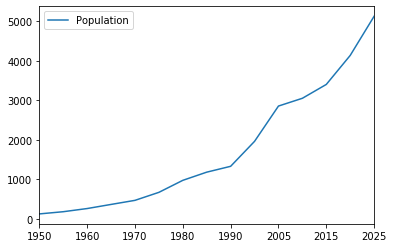

In [4]:
afghanYear.plot()

The percent change of  the population tells a different story. While looking at absolute numbers, the population is climbing. The percent change is more interesting. There is a big drop in the percentage starting at the tailend of 70's and becomes increasingly pronounced until the 90's. This corresponds to the Soviet Invasion. Likewise, 
the American invasion is seen after 2005 with a large spike towards a gradual incline. 

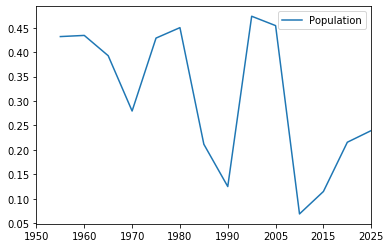

In [5]:
popChange = afghanYear.Population
popChange = popChange.pct_change()
popChange = pd.DataFrame(popChange)
popChange.plot()

This corresponds to the second derivative. The rate of change of growth increased the most after the Soviet and American
Invasion. But, the slope in the 80's is a bit interesting. The graph of the first derative is very negative, but 
the period was just long. The second derivative's graph is not as dramatic as one would expect in those segments. During the 90's this graph reflects expectations. After the Soviet invasion, population was booming, and it fell after the American invasion. This graph does provide more information. For instance, the the graph startes turning negative at the turn of 2000's. The first derivative's graph only really highlights the negative change around 2005. However, it is clearly suggested in the second derivative's graph. 

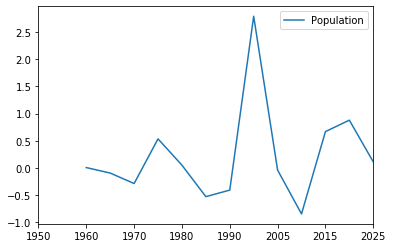

In [6]:
popChangeTwo = popChange.pct_change()
popChange = pd.DataFrame(popChangeTwo)
popChange.plot()

From this analysis, it is clear that the role of invasions are instrumental in understanding the changes in 
Afghanistan. While population as a whole has consistently increased, this picture is a bit deceptive. 
By looking at the graph of derivatives, it possible to see more detail. There are clear spikes and dips that are revealed
by observing the first derivative. Most notably, during the 80's and mid-2000's. These periods are during invasions when the population dropped the most significantly. However, the second derivative shows more detail. The drop from the American invasion can be detected 
in the early 2000's and is more accurate as the invasion started in 2001. This can be observed in the first derivative's graph, but it less clear. Through observing the combined graphs of the orginial data and the derivaties, a more complete understanding of the data may be gained. 